In [1]:
!pip install bing-image-downloader
from bing_image_downloader import downloader

In [2]:
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 727kB 12.7MB/s 
     |████████████████████████████████| 1.1MB 50.2MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
     |████████████████████████████████| 194kB 57.7MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 


In [ ]:
#??downloader.download

In [3]:
muppetNames = 'elmo', 'cookie monster', 'snuffy', 'zoe'
for muppet in muppetNames:
  downloader.download(f'{muppet} sesame street muppet', limit=50, output_dir=f'muppet/{muppet}')



[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from http://images3.wikia.nocookie.net/__cb20110917000616/muppet/images/5/5a/Elmo-elmo-elmo.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/81/bb/4d/81bb4d3a306863f7a6e5fb1e77a5ada4.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://media.gettyimages.com/photos/sesame-street-muppet-elmo-attends-the-12th-annual-sesame-workshop-picture-id494247131?s=612x612
[%] File Downloaded !

[%] Downloading Image #4 from https://www.ctvnews.ca/polopoly_fs/1.3335540.1490186057!/httpImage/image.jpg_gen/derivatives/landscape_620/image.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://i2.cdn.turner.com/cnn/dam/assets/130704041649-sesame-street-muppet-elmo-horizontal-gallery.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://cbsnews1.cbsistatic.com/hub/i/2012/11/21/2623f0b1-a645-11e2-a3f0-029118418759/AP862432864149.jpg
[%] File Downloaded !


In [22]:
path = Path('muppet')
fns = get_image_files(path)
failed = verify_images(fns)
failed, fns, len(fns)

((#0) [],
 (#186) [Path('muppet/cookie monster/cookie monster sesame street muppet/Image_25.jpg'),Path('muppet/cookie monster/cookie monster sesame street muppet/Image_20.jpg'),Path('muppet/cookie monster/cookie monster sesame street muppet/Image_40.jpg'),Path('muppet/cookie monster/cookie monster sesame street muppet/Image_50.png'),Path('muppet/cookie monster/cookie monster sesame street muppet/Image_19.png'),Path('muppet/cookie monster/cookie monster sesame street muppet/Image_42.jpg'),Path('muppet/cookie monster/cookie monster sesame street muppet/Image_31.jpg'),Path('muppet/cookie monster/cookie monster sesame street muppet/Image_12.jpg'),Path('muppet/cookie monster/cookie monster sesame street muppet/Image_41.jpg'),Path('muppet/cookie monster/cookie monster sesame street muppet/Image_46.jpg')...],
 186)

In [5]:
def grandparent_label(o):
    return Path(o).parent.parent.name

In [23]:
image_file = get_image_files(path)[1]
image_file, parent_label(image_file), grandparent_label(image_file)

(Path('muppet/cookie monster/cookie monster sesame street muppet/Image_20.jpg'),
 'cookie monster sesame street muppet',
 'cookie monster')

In [24]:
muppets = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=grandparent_label,
    item_tfms=Resize(128))
dltr = muppets.dataloaders(path)

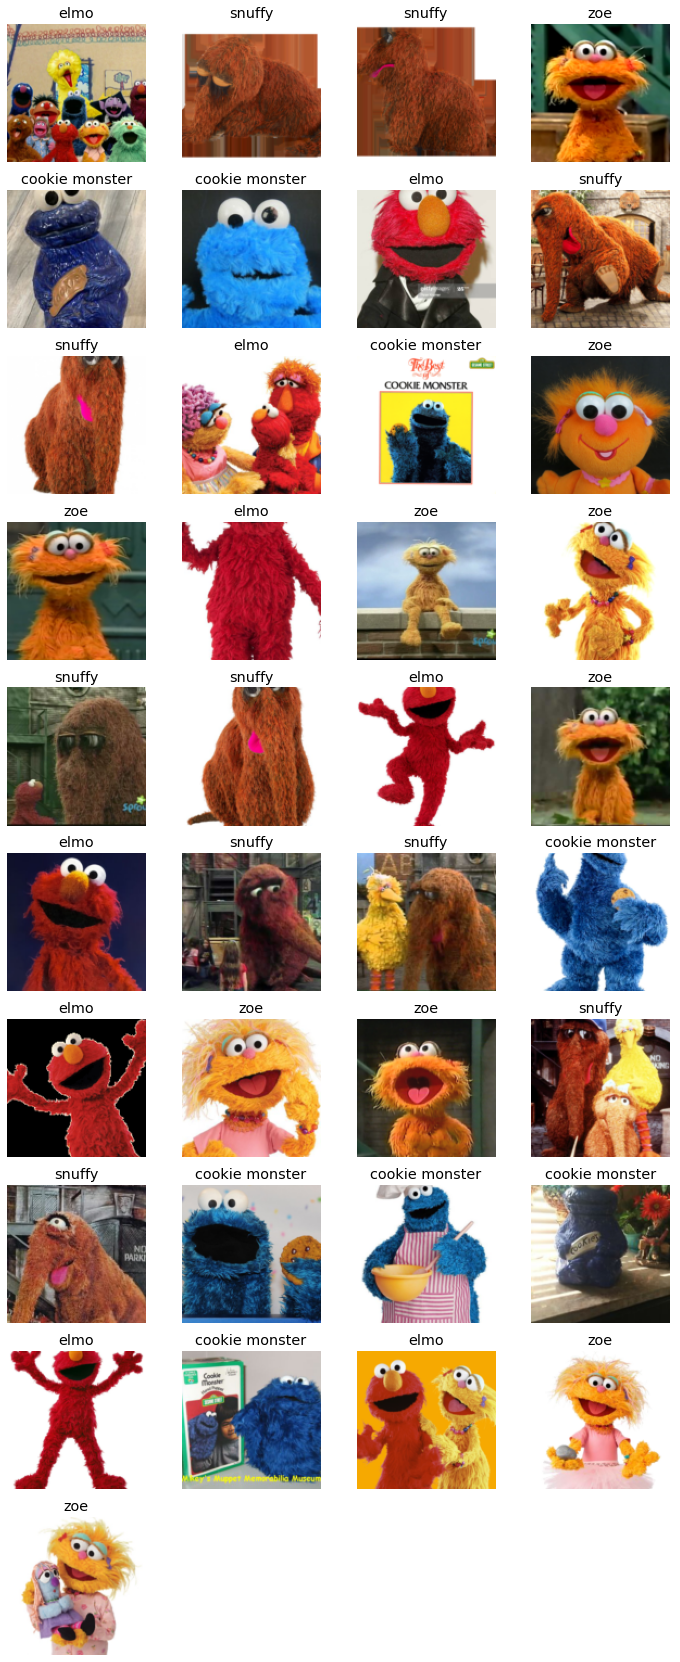

In [25]:
dltr.valid.show_batch(max_n=100, nrows=10)

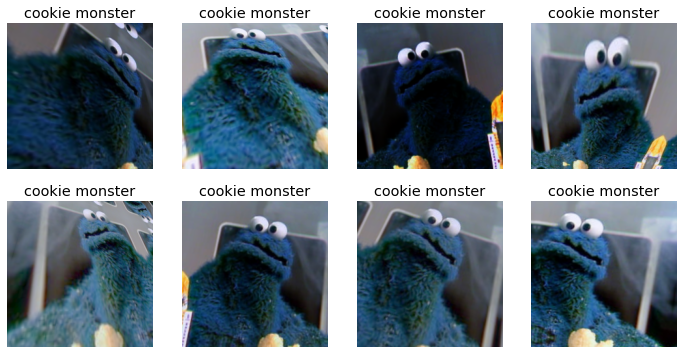

In [26]:
muppets = muppets.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms(mult=2))
dls = muppets.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [27]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

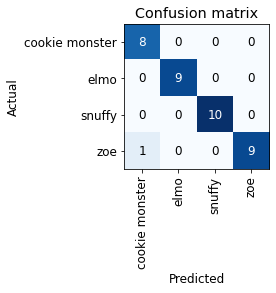

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

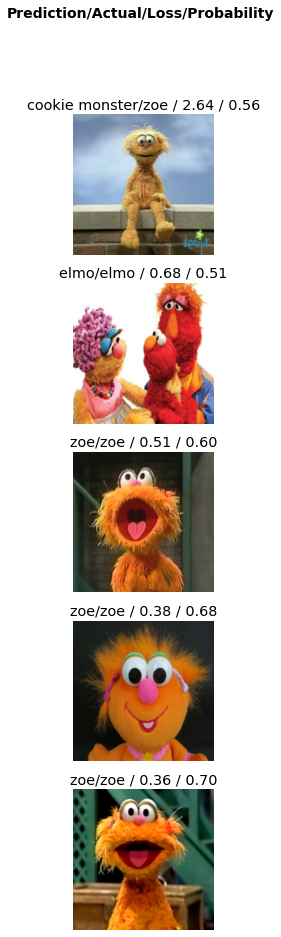

In [29]:
interp.plot_top_losses(5, nrows=5)

In [30]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [19]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [31]:
learn.export()
from google.colab import files
files.download('export.pkl') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>